# Extremas of Multi-D function

In [10]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import fsolve
sympy.init_session()
%matplotlib notebook

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



<IPython.core.display.Javascript object>


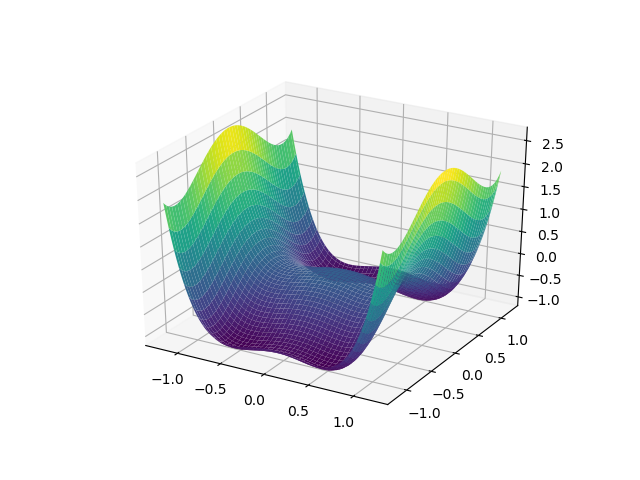

In [8]:
f = lambda x,y: 2*x**4+y**4-x**2-2*y**2
fig = plt.figure()
ax = plt.axes(projection='3d')

# Make data.
r = 1.2
X = np.linspace(-r,r,100)
Y = np.linspace(-r,r,100)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap = 'viridis')
plt.show()

# Let's calculate the gradient and Hessian for that function

In [9]:
f = 2*x**4+y**4-x**2-2*y**2
f

In [10]:
grad = derive_by_array(f,[x,y])
grad

⎡   3           3      ⎤
⎣8⋅x  - 2⋅x  4⋅y  - 4⋅y⎦

In [11]:
H = hessian(f, (x,y))
H

⎡    2               ⎤
⎢24⋅x  - 2      0    ⎥
⎢                    ⎥
⎢               2    ⎥
⎣    0      12⋅y  - 4⎦

In [12]:
h = lambdify([x,y],H)
h(0,1)

array([[-2,  0],
       [ 0,  8]])

## Solve the equation grad=0

In [13]:
solve(grad)

## x = 0, +-1/2   y = 0, +-1

## Hessian deffiniteness

In [22]:
def is_positive(m):
    e = np.linalg.eigvals(m)
    return np.all(e>0)

def is_negative(m):
    e = np.linalg.eigvals(m)
    return np.all(e<0)

def have_negative_and_positive_eigvals(m):
    e = np.linalg.eigvals(m)
    return e[0]*e[1]<0

def analize_hessian(h, points):
    global x,y
    mx,mn,sd,und=[],[],[],[]
    for p in points:
        x0 = p[x]
        y0 = p[y]
        h0 = h(x0,y0).astype('float64')
        if is_positive(h0):
            mn.append((x0,y0))
        elif is_negative(h0):
            mx.append((x0,y0))
        elif have_negative_and_positive_eigvals(h0):
            sd.append((x0,y0))
        else:
            und.append((x0,y0))
            
    if len(mx)>0:
        print("Maximum points")
        for x0, y0 in mx:
            print(f'({x0},{y0})')            
    if len(mn)>0:
        print("\nMinimum points")
        for x0,y0 in mn:
            print(f'({x0},{y0})')            
    if len(sd)>0:
        print("\nSaddle points")
        for x0,y0 in sd:
            print(f'({x0},{y0})')            
    if len(und)>0:
        print("\nUndefined points")
        for x0,y0 in und:
            print(f'({x0},{y0})')

In [23]:
analize_hessian(h,solve(grad))

Maximum points
(0,0)

Minimum points
(-1/2,-1)
(-1/2,1)
(1/2,-1)
(1/2,1)

Saddle points
(-1/2,0)
(0,-1)
(0,1)
(1/2,0)


## Another function

<IPython.core.display.Javascript object>


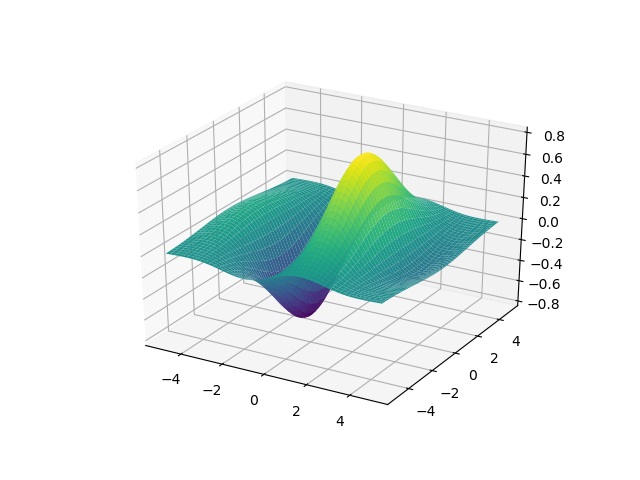

In [43]:
f = lambda x,y: np.exp(-0.1*(x**2+y**2))*np.sin(x)
fig = plt.figure()
ax = plt.axes(projection='3d')

# Make data.
r = 5
X = np.linspace(-r,r,100)
Y = np.linspace(-r,r,100)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap = 'viridis')

In [90]:
f = exp(-0.1*(x**2+y**2))*sin(x)
f

In [91]:
grad = derive_by_array(f,[x,y])
grad = simplify(grad)
grad

⎡                                 2        2                 2        2       
⎢                          - 0.1⋅x  - 0.1⋅y           - 0.1⋅x  - 0.1⋅y        
⎣(-0.2⋅x⋅sin(x) + cos(x))⋅ℯ                   -0.2⋅y⋅ℯ                 ⋅sin(x)

⎤
⎥
⎦

In [135]:
lgrad = lambdify([x,y],grad)
lgrad(0,0)

In [93]:
H = hessian(f, (x,y))
H = simplify(H)
H

⎡                                                     2        2              
⎢⎛      2                                   ⎞  - 0.1⋅x  - 0.1⋅y               
⎢⎝0.04⋅x ⋅sin(x) - 0.4⋅x⋅cos(x) - 1.2⋅sin(x)⎠⋅ℯ                   y⋅(0.04⋅x⋅si
⎢                                                                             
⎢                                              2        2                     
⎢                                       - 0.1⋅x  - 0.1⋅y              ⎛      2
⎣       y⋅(0.04⋅x⋅sin(x) - 0.2⋅cos(x))⋅ℯ                              ⎝0.04⋅y 

                           2        2⎤
                    - 0.1⋅x  - 0.1⋅y ⎥
n(x) - 0.2⋅cos(x))⋅ℯ                 ⎥
                                     ⎥
                2        2           ⎥
      ⎞  - 0.1⋅x  - 0.1⋅y            ⎥
 - 0.2⎠⋅ℯ                 ⋅sin(x)    ⎦

In [94]:
h = lambdify([x,y],H)
h(0,0)

array([[ 0., -0.],
       [-0., -0.]])

In [95]:
solve(grad)

In [96]:
solve(grad[0])

NotImplementedError: No algorithms are implemented to solve equation (-x*sin(x)/5 + cos(x))*exp(-x**2/10 - y**2/10)

## Sympy cant solve this equation

## Using numericl methods

In [127]:
from scipy.optimize import fsolve

In [136]:
fgrad = lambda v: lgrad(v[0],v[1])
fgrad([0,0])

In [138]:
start_point = (0,10)
v = fsolve(fgrad, start_point)
v

array([-7.66790678e-17,  6.44856966e+01])

In [139]:
fgrad(v)

In [146]:
print(fgrad(fsolve(fgrad,(0,1), xtol = 10)))
%timeit fsolve(fgrad,(0,1),xtol = 10)

print(fgrad(fsolve(fgrad,(0,1), xtol = 1)))
%timeit fsolve(fgrad,(0,1),xtol = 1)

print(fgrad(fsolve(fgrad,(0,1), xtol = 0.1)))
%timeit fsolve(fgrad,(0,1),xtol = 0.1)

print(fgrad(fsolve(fgrad,(0,1))))
%timeit fsolve(fgrad,(0,1))

[0.02732371912857835, -1.4232029645113333e-17]
77.6 µs ± 944 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[2.8798544685966674e-05, 5.282937670030297e-20]
157 µs ± 828 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[6.424731146084479e-36, 2.193358628802124e-49]
990 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[5.514649669649302e-175, -4.674105123883223e-188]
4.87 ms ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [198]:
points_count = 20
rg = 5
decimals = 2
xs = np.linspace(-rg,rg,points_count)
ys = np.linspace(-rg,rg,points_count)
X, Y = np.meshgrid(xs,ys)
X, Y = X.reshape(points_count**2,), Y.reshape(points_count**2,)
xtol = 1/10**(decimals+1)
points = [fsolve(fgrad, (start_x,start_y), xtol = xtol )
          for start_x, start_y in zip(X, Y)]

points = [ np.round(p, decimals = decimals) 
          for p in points
          if -rg<p[0]<rg and -rg<p[1]<rg]

points = np.unique(points,axis=0)
for px,py in points:
    print(px,py)
    
len(points)

-4.03 0.0
-1.31 0.0
1.31 0.0
4.03 0.0


In [199]:
def get_zeroes(func ,rg = 5, points_count = 20, decimals = 2):
    xs = np.linspace(-rg,rg,points_count)
    ys = np.linspace(-rg,rg,points_count)
    X, Y = np.meshgrid(xs,ys)
    X, Y = X.reshape(points_count**2,), Y.reshape(points_count**2,)
    xtol = 1/10**(decimals+1)
    points = [fsolve(func, (start_x,start_y), xtol = xtol )
              for start_x, start_y in zip(X, Y)]

    points = [ np.round(p, decimals = decimals) 
              for p in points
              if -rg<p[0]<rg and -rg<p[1]<rg]

    return np.unique(points,axis=0)

In [200]:
get_zeroes(fgrad)

array([[-4.03,  0.  ],
       [-1.31,  0.  ],
       [ 1.31,  0.  ],
       [ 4.03,  0.  ]])

## analize_func function

In [12]:
from IPython.display import display, Math, Latex

def get_zeroes(func ,rg = 5, points_count = 20, decimals = 2):
    xs = np.linspace(-rg,rg,points_count)
    ys = np.linspace(-rg,rg,points_count)
    X, Y = np.meshgrid(xs,ys)
    X, Y = X.reshape(points_count**2,), Y.reshape(points_count**2,)
    xtol = 1/10**(decimals+1)
    points = [fsolve(func, (start_x,start_y), xtol = xtol )
              for start_x, start_y in zip(X, Y)]

    points = [ np.round(p, decimals = decimals) 
              for p in points
              if -rg<p[0]<rg and -rg<p[1]<rg]

    return np.unique(points,axis=0)

def is_positive(m):
    e = np.linalg.eigvals(m)
    return np.all(e>0)

def is_negative(m):
    e = np.linalg.eigvals(m)
    return np.all(e<0)

def have_negative_and_positive_eigvals(m):
    e = np.linalg.eigvals(m)
    return e[0]*e[1]<0

def analize_hessian(h, points):
    global x,y
    mx,mn,sd,und=[],[],[],[]
    for p in points:
        x0 = p[x]
        y0 = p[y]
        h0 = h(x0,y0).astype('float64')
        if is_positive(h0):
            mn.append((x0,y0))
        elif is_negative(h0):
            mx.append((x0,y0))
        elif have_negative_and_positive_eigvals(h0):
            sd.append((x0,y0))
        else:
            und.append((x0,y0))
            
    if len(mx)>0:
        print("Maximum points")
        for x0, y0 in mx:
            print(f'({x0},{y0})')            
    if len(mn)>0:
        print("\nMinimum points")
        for x0,y0 in mn:
            print(f'({x0},{y0})')            
    if len(sd)>0:
        print("\nSaddle points")
        for x0,y0 in sd:
            print(f'({x0},{y0})')            
    if len(und)>0:
        print("\nUndefined points")
        for x0,y0 in und:
            print(f'({x0},{y0})')

def analize_func(f, r = 5, decimals = 2, zero_points_count = 20):
    #display(Eq(Function('f')(x,y), f))
    #get grad and Hessian
    grad = simplify(derive_by_array(f ,[x,y]))
    
    print('Gradient:')
    display(grad)
    lbd_grad = lambdify([x,y],grad)
    func_grad = lambda v: lbd_grad(v[0],v[1])
    H = simplify(hessian(f, (x,y)))
    print('Hessian:')
    display(H)
    h = lambdify([x,y],H)
    #zeroes of grad
    zeroes = get_zeroes(func_grad, rg = r, decimals = decimals, points_count = zero_points_count)
    if len(zeroes)>0:
        print('Zeroes of gradient:')
        print(zeroes)
        print()
        mx,mn,sd,un = analize_hessian(h, zeroes)
    else:
        print(f'The gradient of the function has no zeroes in range ({-r},{r})')

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    lf = lambdify([x,y],f)
    
    plot_func(ax, lf, r = r, p_count = 100 )
    plot_points(ax, lf, mn, mx, sd, un)  
    

def analize_hessian(h, points):
    mx,mn,sd,und=[],[],[],[]
    for p in points:
        x0 = p[0]
        y0 = p[1]
        h0 = h(x0,y0).astype('float64')
        if is_positive(h0):
            mn.append((x0,y0))
        elif is_negative(h0):
            mx.append((x0,y0))
        elif have_negative_and_positive_eigvals(h0):
            sd.append((x0,y0))
        else:
            und.append((x0,y0))
            
    if len(mx)>0:
        print("Maximum points:")
        for x0, y0 in mx:
            print(f'({x0}, {y0})')            
    if len(mn)>0:
        print("\nMinimum points:")
        for x0,y0 in mn:
            print(f'({x0}, {y0})')            
    if len(sd)>0:
        print("\nSaddle points:")
        for x0,y0 in sd:
            print(f'({x0}, {y0})')            
    if len(und)>0:
        print("\nUndefined points:")
        for x0,y0 in und:
            print(f'({x0}, {y0})')
    return mx,mn,sd,und


def plot_points(ax, f, mn, mx, sd, un):
    ax.scatter3D(
        xs = [p[0] for p in mn],
        ys = [p[1] for p in mn],
        zs = [f(p[0],p[1]) for p in mn],
        c = 'b', label = 'Min')    
    ax.scatter3D(
        xs = [p[0] for p in mx],
        ys = [p[1] for p in mx],
        zs = [f(p[0],p[1]) for p in mx],
        c = 'r', label = 'Max')
    ax.scatter3D(
        xs = [p[0] for p in sd],
        ys = [p[1] for p in sd],
        zs = [f(p[0],p[1]) for p in sd],
        c = 'g', label = 'Saddle point')
    ax.scatter3D(
        xs = [p[0] for p in un],
        ys = [p[1] for p in un],
        zs = [f(p[0],p[1]) for p in un],
        c = 'k', label = 'Undefined')
    plt.legend()
    
def plot_func(ax, f, r = 5, p_count = 100 ):
    # Make data.
    X = np.linspace(-r,r, p_count)
    Y = np.linspace(-r,r, p_count)
    X, Y = np.meshgrid(X, Y)
    Z = f(X,Y)
    # Plot the surface.
    ax.plot_surface(X, Y, Z,cmap = 'viridis')

Gradient:


⎡                                 2        2                 2        2       
⎢                          - 0.1⋅x  - 0.1⋅y           - 0.1⋅x  - 0.1⋅y        
⎣(-0.2⋅x⋅sin(x) + cos(x))⋅ℯ                   -0.2⋅y⋅ℯ                 ⋅sin(x)

⎤
⎥
⎦

Hessian:


⎡                                                     2        2              
⎢⎛      2                                   ⎞  - 0.1⋅x  - 0.1⋅y               
⎢⎝0.04⋅x ⋅sin(x) - 0.4⋅x⋅cos(x) - 1.2⋅sin(x)⎠⋅ℯ                   y⋅(0.04⋅x⋅si
⎢                                                                             
⎢                                              2        2                     
⎢                                       - 0.1⋅x  - 0.1⋅y              ⎛      2
⎣       y⋅(0.04⋅x⋅sin(x) - 0.2⋅cos(x))⋅ℯ                              ⎝0.04⋅y 

                           2        2⎤
                    - 0.1⋅x  - 0.1⋅y ⎥
n(x) - 0.2⋅cos(x))⋅ℯ                 ⎥
                                     ⎥
                2        2           ⎥
      ⎞  - 0.1⋅x  - 0.1⋅y            ⎥
 - 0.2⎠⋅ℯ                 ⋅sin(x)    ⎦

Zeroes of gradient:
[[-4.03  0.  ]
 [-1.31  0.  ]
 [ 1.31  0.  ]
 [ 4.03  0.  ]]

Maximum points:
(-4.03, 0.0)
(1.31, 0.0)

Minimum points:
(-1.31, 0.0)
(4.03, 0.0)


<IPython.core.display.Javascript object>


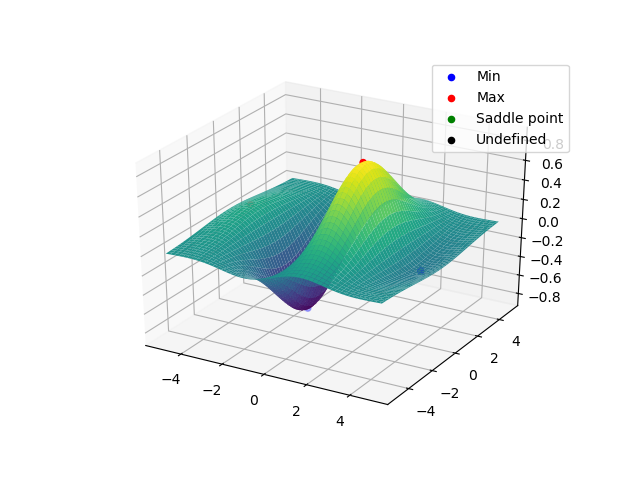

In [367]:
analize_func(f)

In [33]:
f = (x+y)/exp(x**2+y**2)
f

In [34]:
analize_func(f)

Gradient:


⎡                  2    2       2    2                    2    2       2    2⎤
⎢               - x  - y     - x  - y                  - x  - y     - x  - y ⎥
⎣- 2⋅x⋅(x + y)⋅ℯ          + ℯ           - 2⋅y⋅(x + y)⋅ℯ          + ℯ         ⎦

Hessian:


⎡                               2    2                                 2    2 
⎢  ⎛   2                  ⎞  - x  - y                               - x  - y  
⎢2⋅⎝2⋅x ⋅(x + y) - 3⋅x - y⎠⋅ℯ            2⋅(2⋅x⋅y⋅(x + y) - x - y)⋅ℯ          
⎢                                                                             
⎢                              2    2                                   2    2
⎢                           - x  - y      ⎛        2              ⎞  - x  - y 
⎣2⋅(2⋅x⋅y⋅(x + y) - x - y)⋅ℯ            2⋅⎝-x + 2⋅y ⋅(x + y) - 3⋅y⎠⋅ℯ         

⎤
⎥
⎥
⎥
⎥
⎥
⎦

Zeroes of gradient:
[[-0.5 -0.5]
 [ 0.5  0.5]]

Maximum points:
(0.5, 0.5)

Minimum points:
(-0.5, -0.5)


In [31]:
ax = plt.axes(projection='3d')
def f (x,y):
    return (x+y)/np.exp(x**2+y**2)
# Make data.
r=2
p_count = 50
X = np.linspace(-r,r, p_count)
Y = np.linspace(-r,r, p_count)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)
# Plot the surface.
ax.plot_surface(X, Y, Z,cmap = 'viridis')
ax.set_zlim(-r,r)
plt.show()

In [ ]:
    # Make data.
    X = np.linspace(-r,r, p_count)
    Y = np.linspace(-r,r, p_count)
    X, Y = np.meshgrid(X, Y)
    Z = f(X,Y)
    # Plot the surface.
    ax.plot_surface(X, Y, Z,cmap = 'viridis')